In [1]:
import os

# Ruta a la carpeta donde están los archivos (ajústala si no estás en el mismo directorio del script)
carpeta = "tables_dict_txt"  # <-- Cambia esta línea

# Recorremos todos los archivos en la carpeta
for nombre_archivo in os.listdir(carpeta):
    if nombre_archivo.endswith(".txt"):
        ruta_entrada = os.path.join(carpeta, nombre_archivo)
        
        with open(ruta_entrada, "r") as f:
            lines = f.readlines()

        # Extraer solo líneas con datos (ignorando encabezados y separadores)
        data_lines = [line for line in lines if line.strip() and line.strip()[0].isdigit()]
        
        formatted_data = []
        for line in data_lines:
            parts = line.split('|')
            try:
                Z = float(parts[0])
                Q = float(parts[1])
                alpha = float(parts[2])
                JTD = float(parts[3])
                error = float(parts[4])
                space = parts[5].strip()
                formatted_data.append((Z, Q, alpha, JTD, error, space))
            except:
                continue  # Saltar si hay error en una línea

        # Generar nuevo nombre de archivo con extensión .dat
        nombre_salida = os.path.splitext(nombre_archivo)[0] + ".dat"
        ruta_salida = os.path.join(carpeta, nombre_salida)

        # Guardar el archivo en formato Fortran amigable
        with open(ruta_salida, "w") as f:
            for row in formatted_data:
                Z, Q, alpha, JTD, error, space = row
                f.write(f"{Z:10.3f} {Q:10.3f} {alpha:10.3f} {JTD:12.6e} {error:12.6e} {space}\n")

print("✅ Todos los archivos procesados correctamente.")


✅ Todos los archivos procesados correctamente.


In [35]:
import os

# Define las rutas
carpeta_origen = "tables_dict_txt"     # <- Cambia esto
carpeta_destino = "tables_to_read"    # <- Cambia esto


# Crear carpeta destino si no existe
os.makedirs(carpeta_destino, exist_ok=True)

# Cabecera sin la columna 'space'
encabezado = (
    "# Z        Q        alpha     JTD           integration_error\n"
    "# -----------------------------------------------------------\n"
)

# Procesar cada archivo en la carpeta de origen
for nombre_archivo in os.listdir(carpeta_origen):
    if nombre_archivo.endswith(".txt"):
        ruta_entrada = os.path.join(carpeta_origen, nombre_archivo)

        with open(ruta_entrada, "r") as f:
            lines = f.readlines()

        # Filtrar líneas con datos válidos
        data_lines = [line for line in lines if line.strip() and line.strip()[0].isdigit()]

        formatted_data = []
        for line in data_lines:
            parts = line.split('|')
            try:
                Z = float(parts[0])
                Q = float(parts[1])
                alpha = float(parts[2])
                JTD = float(parts[3])
                error = float(parts[4])
                formatted_data.append((Z, Q, alpha, JTD, error))
            except:
                continue  # Saltar si hay error en una línea

        # Nombre del archivo de salida
        nombre_salida = os.path.splitext(nombre_archivo)[0] + ".dat"
        ruta_salida = os.path.join(carpeta_destino, nombre_salida)

        # Escribir archivo con cabecera
        with open(ruta_salida, "w") as f:
            f.write(encabezado)
            for row in formatted_data:
                Z, Q, alpha, JTD, error = row
                f.write(f"{Z:10.3f} {Q:10.3f} {alpha:10.3f} {JTD:12.6e} {error:12.6e}\n")

print("✅ Archivos procesados correctamente sin la columna 'space'.")

✅ Archivos procesados correctamente sin la columna 'space'.


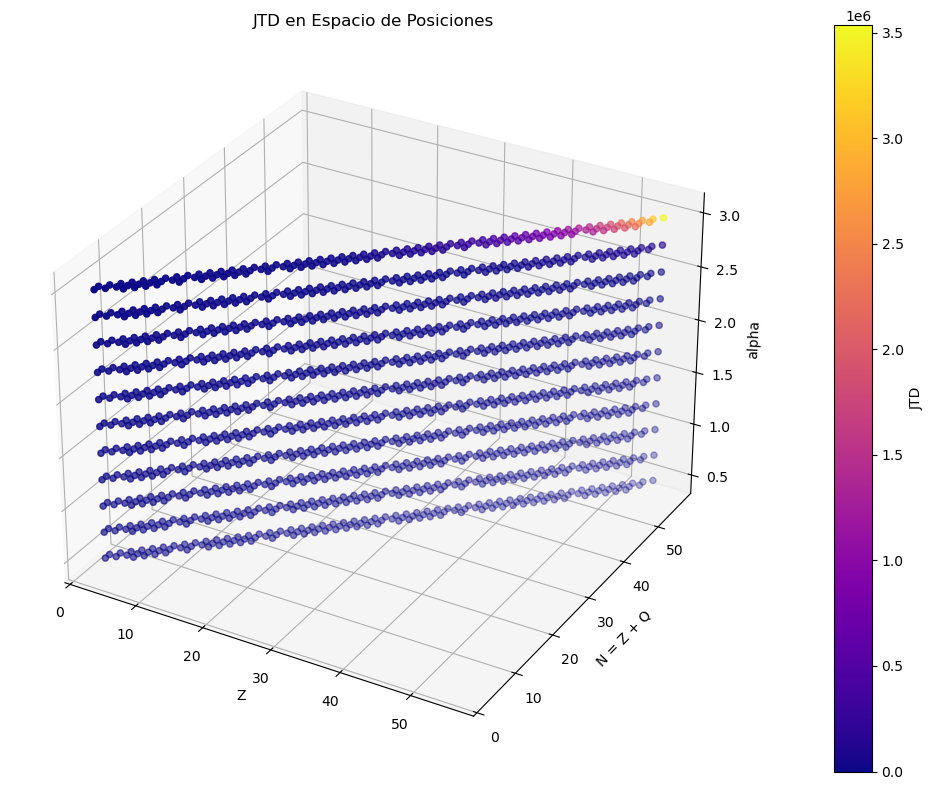

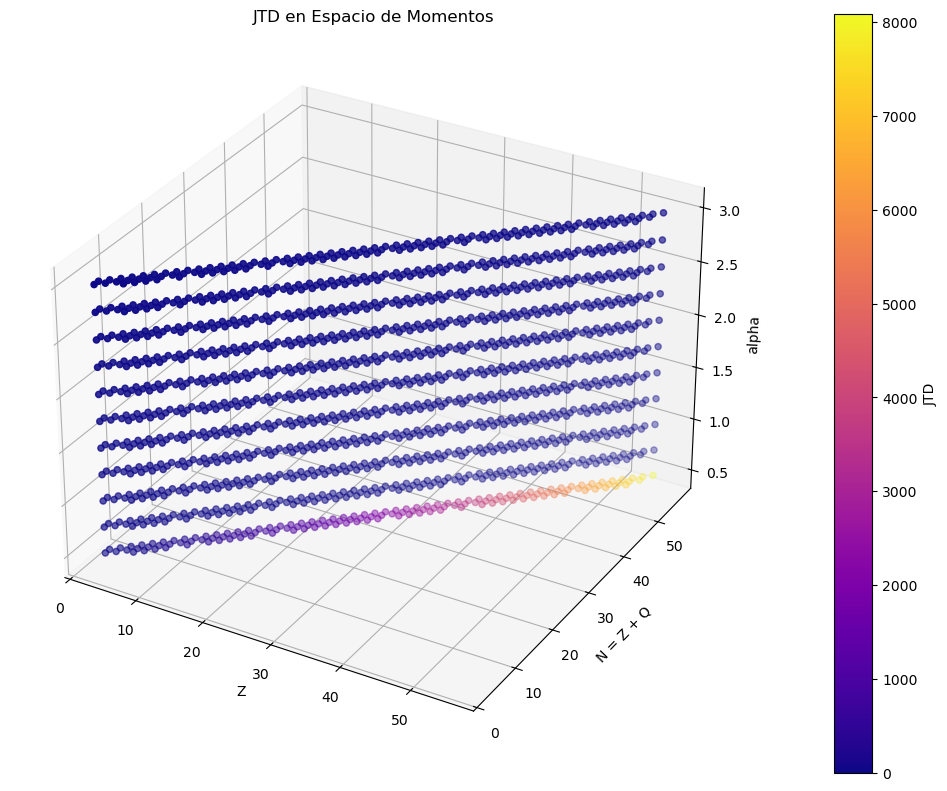

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Carpeta de salida donde están los .dat ya procesados
carpeta_datos = "tables_to_read"  # <-- AJUSTAR

# Inicializar listas por tipo
datos_posiciones = {"Z": [], "N": [], "alpha": [], "JTD": []}
datos_momentos = {"Z": [], "N": [], "alpha": [], "JTD": []}

# Leer todos los .dat
for archivo in os.listdir(carpeta_datos):
    if archivo.endswith(".dat"):
        ruta_archivo = os.path.join(carpeta_datos, archivo)

        # Determinar si es "position" o "momentum" por el nombre del archivo original
        tipo = "momentum" if "momento" in archivo else "position"

        with open(ruta_archivo, "r") as f:
            for line in f:
                if line.strip().startswith("#"):
                    continue
                try:
                    Z, Q, alpha, JTD, error = map(float, line.strip().split())
                    Z_val = Z
                    N_val = Z + Q
                    if tipo == "momentum":
                        datos_momentos["Z"].append(Z_val)
                        datos_momentos["N"].append(N_val)
                        datos_momentos["alpha"].append(alpha)
                        datos_momentos["JTD"].append(JTD)
                    else:
                        datos_posiciones["Z"].append(Z_val)
                        datos_posiciones["N"].append(N_val)
                        datos_posiciones["alpha"].append(alpha)
                        datos_posiciones["JTD"].append(JTD)
                except:
                    continue

# Función para graficar
def graficar_datos(datos, titulo):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(datos["Z"], datos["N"], datos["alpha"], c=datos["JTD"], cmap='plasma')
    ax.set_xlabel("Z")
    ax.set_ylabel("N = Z + Q")
    ax.set_zlabel("alpha")
    ax.set_title(titulo)
    cbar = plt.colorbar(sc, pad=0.1)
    cbar.set_label("JTD")
    plt.tight_layout()
    plt.show()

# Graficar
if datos_posiciones["Z"]:
    graficar_datos(datos_posiciones, "JTD en Espacio de Posiciones")
else:
    print("⚠️ No se encontraron datos para posiciones.")

if datos_momentos["Z"]:
    graficar_datos(datos_momentos, "JTD en Espacio de Momentos")
else:
    print("⚠️ No se encontraron datos para momentos.")


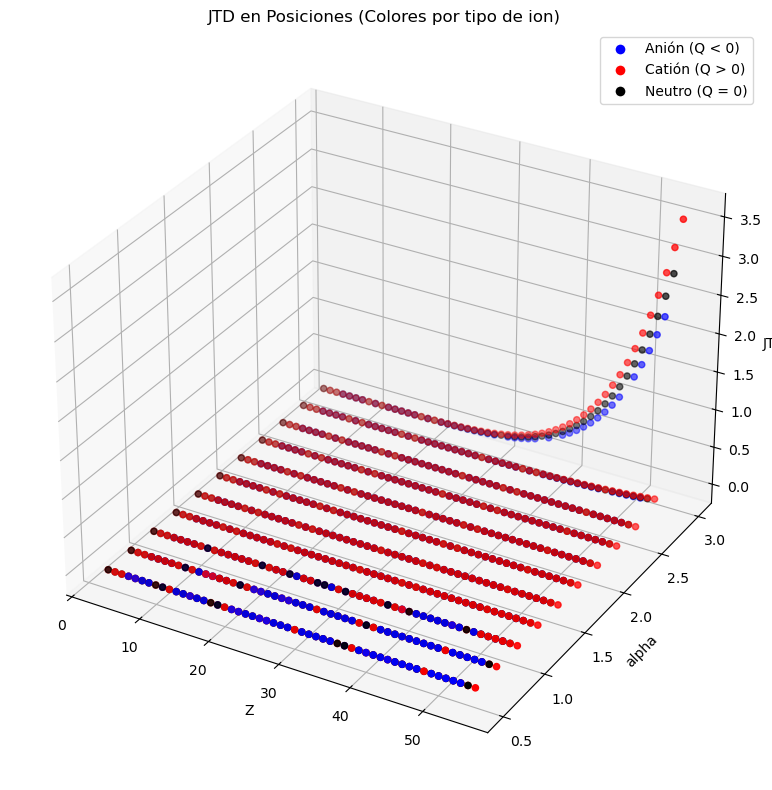

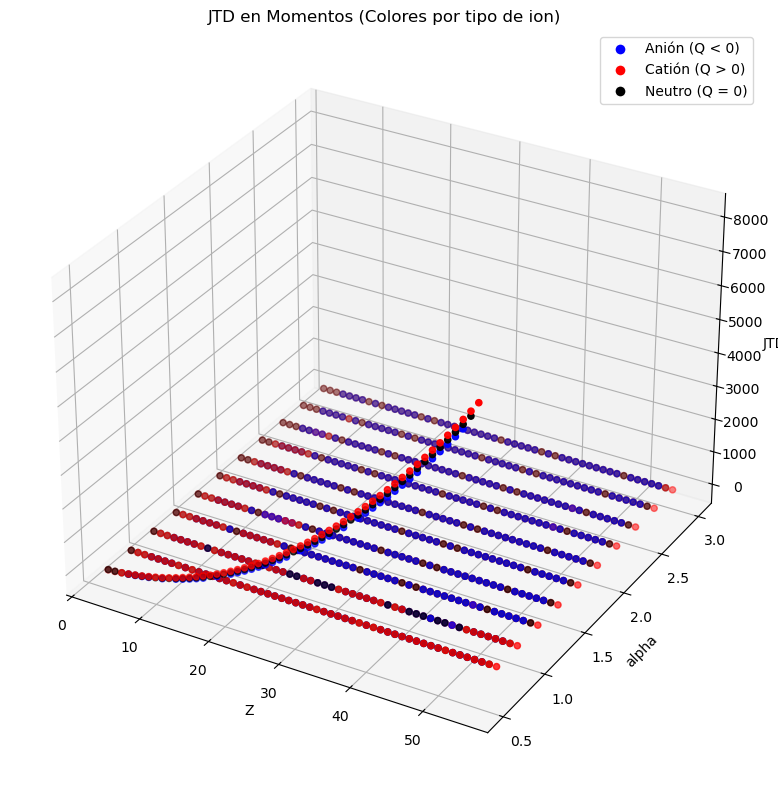

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Carpeta de entrada
carpeta_datos = "tables_to_read"  # <-- AJUSTAR

# Diccionarios separados por tipo de espacio
datos_posiciones = {"Z": [], "alpha": [], "JTD": [], "Q": []}
datos_momentos = {"Z": [], "alpha": [], "JTD": [], "Q": []}

# Clasificar archivos y leer datos
for archivo in os.listdir(carpeta_datos):
    if archivo.endswith(".dat"):
        ruta_archivo = os.path.join(carpeta_datos, archivo)
        tipo = "momentum" if "momento" in archivo else "position"

        with open(ruta_archivo, "r") as f:
            for line in f:
                if line.strip().startswith("#"):
                    continue
                try:
                    Z, Q, alpha, JTD, error = map(float, line.strip().split())
                    if tipo == "momentum":
                        datos_momentos["Z"].append(Z)
                        datos_momentos["alpha"].append(alpha)
                        datos_momentos["JTD"].append(JTD)
                        datos_momentos["Q"].append(Q)
                    else:
                        datos_posiciones["Z"].append(Z)
                        datos_posiciones["alpha"].append(alpha)
                        datos_posiciones["JTD"].append(JTD)
                        datos_posiciones["Q"].append(Q)
                except:
                    continue

# Función para determinar color por tipo de ion
def ion_color(Q):
    if Q < 0:
        return "blue"
    elif Q > 0:
        return "red"
    else:
        return "black"

# Función de graficado
def graficar_coloreado(datos, titulo):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    colores = [ion_color(Q) for Q in datos["Q"]]
    ax.scatter(datos["Z"], datos["alpha"], datos["JTD"], c=colores)

    ax.set_xlabel("Z")
    ax.set_ylabel("alpha")
    ax.set_zlabel("JTD")
    ax.set_title(titulo)

    # Leyenda manual
    from matplotlib.lines import Line2D
    leyenda = [
        Line2D([0], [0], marker='o', color='w', label='Anión (Q < 0)', markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Catión (Q > 0)', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Neutro (Q = 0)', markerfacecolor='black', markersize=8),
    ]
    ax.legend(handles=leyenda, loc='upper right')

    plt.tight_layout()
    plt.show()

# Mostrar gráficos
if datos_posiciones["Z"]:
    graficar_coloreado(datos_posiciones, "JTD en Posiciones (Colores por tipo de ion)")
else:
    print("⚠️ No hay datos para posiciones.")

if datos_momentos["Z"]:
    graficar_coloreado(datos_momentos, "JTD en Momentos (Colores por tipo de ion)")
else:
    print("⚠️ No hay datos para momentos.")


In [ ]:
import matplotlib
matplotlib.use("TkAgg")

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Carpeta donde están los archivos procesados
carpeta_datos = "tables_to_read"  # <-- AJUSTAR

# Diccionarios por espacio
datos_posiciones = {"Z": [], "alpha": [], "JTD": [], "Q": []}
datos_momentos = {"Z": [], "alpha": [], "JTD": [], "Q": []}

# Leer archivos
for archivo in os.listdir(carpeta_datos):
    if archivo.endswith(".dat"):
        ruta_archivo = os.path.join(carpeta_datos, archivo)
        tipo = "momentum" if "momento" in archivo else "position"

        with open(ruta_archivo, "r") as f:
            for line in f:
                if line.strip().startswith("#"):
                    continue
                try:
                    Z, Q, alpha, JTD, error = map(float, line.strip().split())
                    if JTD <= 0:
                        continue  # log10 no está definido para JTD <= 0
                    if tipo == "momentum":
                        datos_momentos["Z"].append(Z)
                        datos_momentos["alpha"].append(alpha)
                        datos_momentos["JTD"].append(np.log(JTD))
                        datos_momentos["Q"].append(Q)
                    else:
                        datos_posiciones["Z"].append(Z)
                        datos_posiciones["alpha"].append(alpha)
                        datos_posiciones["JTD"].append(np.log(JTD))
                        datos_posiciones["Q"].append(Q)
                except:
                    continue

# Función de color por tipo de ion
def ion_color(Q):
    if Q < 0:
        return "blue"
    elif Q > 0:
        return "red"
    else:
        return "black"

# Función para graficar
def graficar_log_jtd(datos, titulo):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    colores = [ion_color(Q) for Q in datos["Q"]]
    ax.scatter(datos["Z"], datos["alpha"], datos["JTD"], c=colores)

    ax.set_xlabel("Z")
    ax.set_ylabel("alpha")
    ax.set_zlabel("log10(JTD)")
    ax.set_title(titulo)

    leyenda = [
        Line2D([0], [0], marker='o', color='w', label='Anión (Q < 0)', markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Catión (Q > 0)', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Neutro (Q = 0)', markerfacecolor='black', markersize=8),
    ]
    ax.legend(handles=leyenda, loc='upper right')

    plt.tight_layout()
    plt.show()

# Graficar ambos espacios
if datos_posiciones["Z"]:
    graficar_log_jtd(datos_posiciones, "log(JTD) en Posiciones (Colores por tipo de ion)")
else:
    print("⚠️ No hay datos para posiciones.")

if datos_momentos["Z"]:
    graficar_log_jtd(datos_momentos, "log(JTD) en Momentos (Colores por tipo de ion)")
else:
    print("⚠️ No hay datos para momentos.")


In [39]:
import matplotlib
matplotlib.use("TkAgg")

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Ruta a tus archivos .dat
carpeta_datos = "tables_to_read"

# Estructuras para datos
datos_posiciones = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}
datos_momentos = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}

# Leer archivos .dat
for archivo in os.listdir(carpeta_datos):
    if archivo.endswith(".dat"):
        ruta_archivo = os.path.join(carpeta_datos, archivo)
        tipo = "momentum" if "momento" in archivo else "position"

        with open(ruta_archivo, "r") as f:
            for line in f:
                if line.strip().startswith("#"):
                    continue
                try:
                    Z, Q, alpha, JTD, _ = map(float, line.strip().split())
                    if JTD <= 0:
                        continue
                    log_JTD = np.log10(JTD)
                    target = datos_momentos if tipo == "momentum" else datos_posiciones
                    target["Z"].append(Z)
                    target["alpha"].append(alpha)
                    target["JTD_log"].append(log_JTD)
                    target["Q"].append(Q)
                except:
                    continue

# Función para asignar color según Q
def ion_color(Q):
    if Q < 0:
        return "blue"
    elif Q > 0:
        return "red"
    else:
        return "black"

# Crear figura con subplots 3D
fig = plt.figure(figsize=(12, 6))

# --- Posiciones ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
colores_pos = [ion_color(q) for q in datos_posiciones["Q"]]
ax1.scatter(datos_posiciones["Z"], datos_posiciones["alpha"], datos_posiciones["JTD_log"], c=colores_pos)
ax1.set_title("Posiciones")
ax1.set_xlabel("Z")
ax1.set_ylabel("alpha")
ax1.set_zlabel("log10(JTD)")

# --- Momentos ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
colores_mom = [ion_color(q) for q in datos_momentos["Q"]]
ax2.scatter(datos_momentos["Z"], datos_momentos["alpha"], datos_momentos["JTD_log"], c=colores_mom)
ax2.set_title("Momentos")
ax2.set_xlabel("Z")
ax2.set_ylabel("alpha")
ax2.set_zlabel("log10(JTD)")

# Leyenda común
leyenda = [
    Line2D([0], [0], marker='o', color='w', label='Anión (Q < 0)', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Catión (Q > 0)', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Neutro (Q = 0)', markerfacecolor='black', markersize=8),
]
fig.legend(handles=leyenda, loc='upper center', ncol=3)

plt.tight_layout()
plt.show()


In [30]:
import json

with open("resultsJTD-ani-faltantes.json", "r", encoding="utf-8") as f:
    faltantes = json.load(f)

with open("resultsJTD-ani.json", "r", encoding="utf-8") as f:
    originales = json.load(f)

print(originales)


{'JTD - momento alpha=1.750-ani': [{'Z': 6, 'Q': -1, 'alpha': 1.75, 'JTD': 1.9059865189852343e-05, 'integration_error': 1.4600131149840356e-07, 'space': 'momentum'}, {'Z': 7, 'Q': -1, 'alpha': 1.75, 'JTD': 4.36279573659816e-06, 'integration_error': 5.586361519812144e-08, 'space': 'momentum'}, {'Z': 8, 'Q': -1, 'alpha': 1.75, 'JTD': 1.2786779051263707e-06, 'integration_error': 9.792552931794018e-08, 'space': 'momentum'}, {'Z': 9, 'Q': -1, 'alpha': 1.75, 'JTD': 4.456928916722053e-07, 'integration_error': 6.035189957530953e-08, 'space': 'momentum'}, {'Z': 11, 'Q': -1, 'alpha': 1.75, 'JTD': 0.003794112373355544, 'integration_error': 1.2800317443057666e-07, 'space': 'momentum'}, {'Z': 13, 'Q': -1, 'alpha': 1.75, 'JTD': 7.24318887150868e-05, 'integration_error': 1.4260574422877687e-07, 'space': 'momentum'}, {'Z': 14, 'Q': -1, 'alpha': 1.75, 'JTD': 2.0188568884684454e-05, 'integration_error': 9.432521634235725e-08, 'space': 'momentum'}, {'Z': 15, 'Q': -1, 'alpha': 1.75, 'JTD': 8.1960104089952

In [31]:
for key in originales.keys():
    originales[key] = faltantes[key][0:3]+originales[key]

In [32]:
print(originales)

{'JTD - momento alpha=1.750-ani': [{'Z': 3, 'Q': -1, 'alpha': 1.75, 'JTD': 0.071334642056022, 'integration_error': 1.4598791878985776e-07, 'space': 'momentum'}, {'Z': 5, 'Q': -1, 'alpha': 1.75, 'JTD': 0.00011435566263641186, 'integration_error': 1.3964379336472552e-07, 'space': 'momentum'}, {'Z': 6, 'Q': -1, 'alpha': 1.75, 'JTD': 1.9059865189852346e-05, 'integration_error': 1.4600131149840356e-07, 'space': 'momentum'}, {'Z': 6, 'Q': -1, 'alpha': 1.75, 'JTD': 1.9059865189852343e-05, 'integration_error': 1.4600131149840356e-07, 'space': 'momentum'}, {'Z': 7, 'Q': -1, 'alpha': 1.75, 'JTD': 4.36279573659816e-06, 'integration_error': 5.586361519812144e-08, 'space': 'momentum'}, {'Z': 8, 'Q': -1, 'alpha': 1.75, 'JTD': 1.2786779051263707e-06, 'integration_error': 9.792552931794018e-08, 'space': 'momentum'}, {'Z': 9, 'Q': -1, 'alpha': 1.75, 'JTD': 4.456928916722053e-07, 'integration_error': 6.035189957530953e-08, 'space': 'momentum'}, {'Z': 11, 'Q': -1, 'alpha': 1.75, 'JTD': 0.0037941123733555

In [33]:
with open("resultsJTD-ani-fixed.json", "w", encoding="utf-8") as f:
    json.dump(originales, f, ensure_ascii=False, indent=4)

In [34]:
from file_manager import load_system, select_atoms_by_Z, json_to_multiple_txt

json_to_multiple_txt("resultsJTD-ani-fixed.json")

In [40]:
import os
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ruta a tus archivos .dat
carpeta_datos = "tables_to_read"

# Estructuras para datos
datos_posiciones = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}
datos_momentos = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}

# Leer archivos .dat
for archivo in os.listdir(carpeta_datos):
    if archivo.endswith(".dat"):
        ruta_archivo = os.path.join(carpeta_datos, archivo)
        tipo = "momentum" if "momento" in archivo else "position"

        with open(ruta_archivo, "r") as f:
            for line in f:
                if line.strip().startswith("#"):
                    continue
                try:
                    Z, Q, alpha, JTD, _ = map(float, line.strip().split())
                    if JTD <= 0:
                        continue
                    log_JTD = np.log10(JTD)
                    alpha = round(alpha, 2)  # Redondear para agrupar
                    target = datos_momentos if tipo == "momentum" else datos_posiciones
                    target["Z"].append(Z)
                    target["alpha"].append(alpha)
                    target["JTD_log"].append(log_JTD)
                    target["Q"].append(Q)
                except:
                    continue

# Valores únicos de alpha
alphas_unicos = sorted(set(datos_posiciones["alpha"]) | set(datos_momentos["alpha"]))

# Función de color según Q
def color_por_Q(Q):
    if Q < 0: return "blue"
    elif Q > 0: return "red"
    else: return "black"

# Crear figura con dos subplots 3D
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                    subplot_titles=('Posiciones', 'Momentos'))

# Guardar todas las trazas para controlarlas con botones
trazas = []

# Crear una traza por cada alpha
for alpha_val in alphas_unicos:
    # Posiciones filtradas
    indices_pos = [i for i, a in enumerate(datos_posiciones["alpha"]) if a == alpha_val]
    pos_data = {
        "Z": [datos_posiciones["Z"][i] for i in indices_pos],
        "alpha": [datos_posiciones["alpha"][i] for i in indices_pos],
        "JTD_log": [datos_posiciones["JTD_log"][i] for i in indices_pos],
        "color": [color_por_Q(datos_posiciones["Q"][i]) for i in indices_pos]
    }

    # Momentos filtrados
    indices_mom = [i for i, a in enumerate(datos_momentos["alpha"]) if a == alpha_val]
    mom_data = {
        "Z": [datos_momentos["Z"][i] for i in indices_mom],
        "alpha": [datos_momentos["alpha"][i] for i in indices_mom],
        "JTD_log": [datos_momentos["JTD_log"][i] for i in indices_mom],
        "color": [color_por_Q(datos_momentos["Q"][i]) for i in indices_mom]
    }

    # Trazas para posiciones
    traza_pos = go.Scatter3d(
        x=pos_data["Z"],
        y=pos_data["alpha"],
        z=pos_data["JTD_log"],
        mode='markers',
        marker=dict(size=5, color=pos_data["color"], opacity=0.8),
        name=f'alpha = {alpha_val}',
        visible=True  # Controlado luego
    )
    fig.add_trace(traza_pos, row=1, col=1)
    trazas.append(traza_pos)

    # Trazas para momentos
    traza_mom = go.Scatter3d(
        x=mom_data["Z"],
        y=mom_data["alpha"],
        z=mom_data["JTD_log"],
        mode='markers',
        marker=dict(size=5, color=mom_data["color"], opacity=0.8),
        name=f'alpha = {alpha_val}',
        visible=True  # Controlado luego
    )
    fig.add_trace(traza_mom, row=1, col=2)
    trazas.append(traza_mom)

# Crear menú de selección (checkboxes)
botones = []
for i, alpha_val in enumerate(alphas_unicos):
    visibilidad = [False] * len(trazas)
    visibilidad[i * 2] = True  # Posición
    visibilidad[i * 2 + 1] = True  # Momento

    botones.append(dict(
        label=f"alpha = {alpha_val}",
        method="update",
        args=[{"visible": visibilidad}]
    ))

# Añadir menú de checkboxes
fig.update_layout(
    updatemenus=[dict(
        type="dropdown",  # Cambia a "buttons" si prefieres botones fijos
        direction="down",
        buttons=botones,
        showactive=True,
        x=1.05,
        xanchor="left",
        y=1.0
    )],
    scene1=dict(xaxis_title='Z', yaxis_title='alpha', zaxis_title='log10(JTD)'),
    scene2=dict(xaxis_title='Z', yaxis_title='alpha', zaxis_title='log10(JTD)'),
    title="Comparación de JTD en Posiciones y Momentos (filtrado por alpha)"
)

# Mostrar y guardar como HTML
fig.show()
fig.write_html("grafico_filtrado_alpha.html")


In [41]:
import os
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ruta a tus archivos .dat
carpeta_datos = "tables_to_read"

# Estructuras para datos
datos_posiciones = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}
datos_momentos = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}

# Leer archivos .dat
for archivo in os.listdir(carpeta_datos):
    if archivo.endswith(".dat"):
        ruta_archivo = os.path.join(carpeta_datos, archivo)
        tipo = "momentum" if "momento" in archivo else "position"

        with open(ruta_archivo, "r") as f:
            for line in f:
                if line.strip().startswith("#"):
                    continue
                try:
                    Z, Q, alpha, JTD, _ = map(float, line.strip().split())
                    if JTD <= 0:
                        continue
                    log_JTD = np.log10(JTD)
                    alpha = round(alpha, 2)  # Redondear alpha
                    target = datos_momentos if tipo == "momentum" else datos_posiciones
                    target["Z"].append(Z)
                    target["alpha"].append(alpha)
                    target["JTD_log"].append(log_JTD)
                    target["Q"].append(Q)
                except:
                    continue

# Valores únicos de alpha
alphas_unicos = sorted(set(datos_posiciones["alpha"]) | set(datos_momentos["alpha"]))

def color_por_Q(Q):
    if Q < 0:
        return "blue"
    elif Q > 0:
        return "red"
    else:
        return "black"

# Crear figura con dos subplots 3D
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('Posiciones', 'Momentos')
)

# Listas para almacenar trazas
trazas = []

# Agregar trazas por alpha (posición y momento)
for alpha_val in alphas_unicos:
    # Posiciones
    indices_pos = [i for i, a in enumerate(datos_posiciones["alpha"]) if a == alpha_val]
    pos_data = {
        "Z": [datos_posiciones["Z"][i] for i in indices_pos],
        "alpha": [datos_posiciones["alpha"][i] for i in indices_pos],
        "JTD_log": [datos_posiciones["JTD_log"][i] for i in indices_pos],
        "color": [color_por_Q(datos_posiciones["Q"][i]) for i in indices_pos]
    }

    fig.add_trace(go.Scatter3d(
        x=pos_data["Z"],
        y=pos_data["alpha"],
        z=pos_data["JTD_log"],
        mode='markers',
        marker=dict(size=5, color=pos_data["color"], opacity=0.8),
        name=f'alpha = {alpha_val}',
        legendgroup=f'alpha_{alpha_val}',
        showlegend=False,  # Ocultar para no duplicar en la leyenda
        visible=(alpha_val == alphas_unicos[0])  # Solo mostrar el primero al inicio
    ), row=1, col=1)

    # Momentos
    indices_mom = [i for i, a in enumerate(datos_momentos["alpha"]) if a == alpha_val]
    mom_data = {
        "Z": [datos_momentos["Z"][i] for i in indices_mom],
        "alpha": [datos_momentos["alpha"][i] for i in indices_mom],
        "JTD_log": [datos_momentos["JTD_log"][i] for i in indices_mom],
        "color": [color_por_Q(datos_momentos["Q"][i]) for i in indices_mom]
    }

    fig.add_trace(go.Scatter3d(
        x=mom_data["Z"],
        y=mom_data["alpha"],
        z=mom_data["JTD_log"],
        mode='markers',
        marker=dict(size=5, color=mom_data["color"], opacity=0.8),
        name=f'alpha = {alpha_val}',
        legendgroup=f'alpha_{alpha_val}',
        showlegend=False,
        visible=(alpha_val == alphas_unicos[0])
    ), row=1, col=2)

# Añadir trazas "fantasma" para la leyenda (tipo de ion)
fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                           marker=dict(size=6, color='blue'), name='Anión (Q < 0)'), row=1, col=1)
fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                           marker=dict(size=6, color='red'), name='Catión (Q > 0)'), row=1, col=1)
fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                           marker=dict(size=6, color='black'), name='Neutro (Q = 0)'), row=1, col=1)

# Crear menú desplegable por alpha
botones = []
for i, alpha_val in enumerate(alphas_unicos):
    visibilidad = [False] * (2 * len(alphas_unicos)) + [True, True, True]  # Solo leyenda al final
    visibilidad[i * 2] = True     # Posiciones
    visibilidad[i * 2 + 1] = True # Momentos
    botones.append(dict(
        label=f"alpha = {alpha_val}",
        method="update",
        args=[{"visible": visibilidad}]
    ))

# Añadir menú desplegable al layout
fig.update_layout(
    updatemenus=[dict(
        buttons=botones,
        direction="down",
        showactive=True,
        x=1.05,
        xanchor="left",
        y=1
    )],
    scene1=dict(xaxis_title='Z', yaxis_title='alpha', zaxis_title='log10(JTD)'),
    scene2=dict(xaxis_title='Z', yaxis_title='alpha', zaxis_title='log10(JTD)'),
    title="Comparación de JTD en Posiciones y Momentos (filtrado por alpha)",
    legend_title_text='Tipo de Ion'
)

# Mostrar y guardar HTML
fig.show()
fig.write_html("grafico_filtrado_alpha_con_leyenda.html")


In [43]:
import os
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ruta a tus archivos .dat
carpeta_datos = "tables_to_read"

# Estructuras para datos
datos_posiciones = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}
datos_momentos = {"Z": [], "alpha": [], "JTD_log": [], "Q": []}

# Leer archivos .dat
for archivo in os.listdir(carpeta_datos):
    if archivo.endswith(".dat"):
        ruta_archivo = os.path.join(carpeta_datos, archivo)
        tipo = "momentum" if "momento" in archivo else "position"

        with open(ruta_archivo, "r") as f:
            for line in f:
                if line.strip().startswith("#"):
                    continue
                try:
                    Z, Q, alpha, JTD, _ = map(float, line.strip().split())
                    if JTD <= 0:
                        continue
                    log_JTD = np.log10(JTD)
                    alpha = round(alpha, 2)  # Agrupar alphas similares
                    target = datos_momentos if tipo == "momentum" else datos_posiciones
                    target["Z"].append(Z)
                    target["alpha"].append(alpha)
                    target["JTD_log"].append(log_JTD)
                    target["Q"].append(Q)
                except:
                    continue

# Lista de alphas únicos
alphas_unicos = sorted(set(datos_posiciones["alpha"]) | set(datos_momentos["alpha"]))

# Tipos de ion
tipos_ion = [
    ("anion", lambda q: q < 0, "Anión (Q < 0)", "blue"),
    ("cation", lambda q: q > 0, "Catión (Q > 0)", "red"),
    ("neutro", lambda q: q == 0, "Neutro (Q = 0)", "black"),
]

# Crear figura
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('Posiciones', 'Momentos')
)

# Guardamos las trazas para el menú
trazas = []
nombre_trazas = []

# Agregar trazas por alpha y tipo de ion
for alpha in alphas_unicos:
    for tipo, condicion, nombre_leyenda, color in tipos_ion:
        # Posiciones
        indices = [i for i, a in enumerate(datos_posiciones["alpha"]) if a == alpha and condicion(datos_posiciones["Q"][i])]
        if indices:
            fig.add_trace(go.Scatter3d(
                x=[datos_posiciones["Z"][i] for i in indices],
                y=[datos_posiciones["alpha"][i] for i in indices],
                z=[datos_posiciones["JTD_log"][i] for i in indices],
                mode='markers',
                marker=dict(size=5, color=color, opacity=0.8),
                name=nombre_leyenda,
                legendgroup=tipo,
                showlegend=True,  # Solo activaremos leyenda en la primera alpha
                visible=False
            ), row=1, col=1)
            trazas.append(len(fig.data) - 1)
            nombre_trazas.append((alpha, tipo))

        # Momentos
        indices = [i for i, a in enumerate(datos_momentos["alpha"]) if a == alpha and condicion(datos_momentos["Q"][i])]
        if indices:
            fig.add_trace(go.Scatter3d(
                x=[datos_momentos["Z"][i] for i in indices],
                y=[datos_momentos["alpha"][i] for i in indices],
                z=[datos_momentos["JTD_log"][i] for i in indices],
                mode='markers',
                marker=dict(size=5, color=color, opacity=0.8),
                name=nombre_leyenda,
                legendgroup=tipo,
                showlegend=True if alpha == alphas_unicos[0] else False,
                visible=False
            ), row=1, col=2)
            trazas.append(len(fig.data) - 1)
            nombre_trazas.append((alpha, tipo))

# Añadir menú desplegable por alpha
botones = []

# Botón "Mostrar todo"
todo_visible = [True] * len(fig.data)
botones.append(dict(
    label="Mostrar todo",
    method="update",
    args=[{"visible": todo_visible}]
))

# Botones por alpha individual
for alpha in alphas_unicos:
    visibilidad = []
    for i, (a_val, _) in enumerate(nombre_trazas):
        visibilidad.append(a_val == alpha)
    botones.append(dict(
        label=f"alpha = {alpha}",
        method="update",
        args=[{"visible": visibilidad}]
    ))

# Layout final
fig.update_layout(
    updatemenus=[dict(
        buttons=botones,
        direction="down",
        showactive=True,
        x=1.05,
        xanchor="left",
        y=1
    )],
    scene1=dict(xaxis_title='Z', yaxis_title='alpha', zaxis_title='log10(JTD)'),
    scene2=dict(xaxis_title='Z', yaxis_title='alpha', zaxis_title='log10(JTD)'),
    title="JTD en Posiciones y Momentos – Filtro por alpha y tipo de ion",
    legend_title_text='Tipo de Ion'
)

# Mostrar y guardar
fig.show()
fig.write_html("grafico_completo_filtrado.html")
